# Análise

Fonte: [https://projecteuler.net/problem=442](https://projecteuler.net/problem=442)

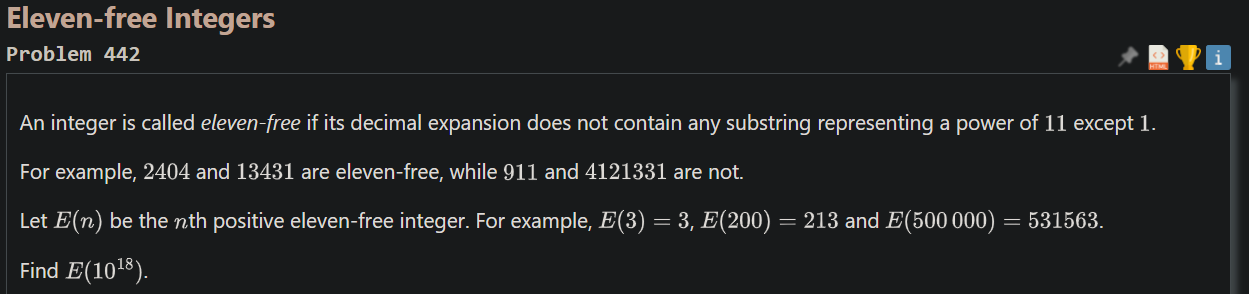

In [17]:
import math
from random import randint
import pandas as pd

In [167]:
potencias_de_11 = set([pow(11, k) for k in range(1, 18, 1)])
potencias_de_11

{11,
 121,
 1331,
 14641,
 161051,
 1771561,
 19487171,
 214358881,
 2357947691,
 25937424601,
 285311670611,
 3138428376721,
 34522712143931,
 379749833583241,
 4177248169415651,
 45949729863572161,
 505447028499293771}

In [43]:
def eleven_free(n: int)-> bool:
    
    n_str = str(n)
    possibilidades = sorted([int(n_str[-k:]) for k in range(len(n_str))])

    combinacoes = []
    for possibilidade in possibilidades:
        p_str = str(possibilidade)
        for k in range(len(p_str), 0, -1):
            if k > 1:
                janela = k
                for cursor in range(0, len(p_str)-janela+1):
                    combinacoes.append(int(p_str[cursor:cursor+janela]))
    
    combinacoes = set(combinacoes)

    intercessao_entre_numeros_e_potencias_de_11 = list(combinacoes & potencias_de_11)

    return len(intercessao_entre_numeros_e_potencias_de_11) == 0

for _ in range(10):
    numero = randint(10, 999_999_999)
    is_eleven_free = eleven_free(numero)
    print (f'{numero=}, {is_eleven_free=}')

numero=293690467, is_eleven_free=True
numero=126143277, is_eleven_free=True
numero=447761563, is_eleven_free=True
numero=490081101, is_eleven_free=False
numero=317455055, is_eleven_free=True
numero=969243372, is_eleven_free=True
numero=888854178, is_eleven_free=True
numero=121581397, is_eleven_free=False
numero=488808285, is_eleven_free=True
numero=279114999, is_eleven_free=False


In [44]:
eleven_free_count = 0
ENESIMO_ELEVEN_FREE = 500_000

n = 0
while eleven_free_count < ENESIMO_ELEVEN_FREE:
    n += 1

    if (eleven_free(n)):
        eleven_free_count += 1

print (f'{n=}')

n=531563


In [166]:
eleven_free_count = 0
dados = []
for n in range(1, 1000000+1, 1):
    if (eleven_free(n)):
        eleven_free_count += 1
    
    dados.append([n, eleven_free_count])

df = pd.DataFrame(dados, columns=['n', 'eleven_free_count'])
df['diferenca'] = df['n'] - df['eleven_free_count']
df.tail()

,n,eleven_free_count,diferenca
999995,999996,950595,49401
999996,999997,950596,49401
999997,999998,950597,49401
999998,999999,950598,49401
999999,1000000,950599,49401


grandeza    n           enesimo
1           10          0
2           100         1
3           1_000       20
4           10_000      299
5           100_000     3970
6           1_000_000   49401

In [34]:
n = '11'
for k in range(1, 3+1, 1):
    if (k == int(n[-1])):
        print ('ok')

ok


# 2ª Tentativa

In [5]:
import numpy as np
import math
import pandas as pd

In [19]:
vetor_anterior = [0]
numeros_validos = []

for ciclo in range(4):
    print (f'{ciclo=}')

    vetor_sucessor = [int(f'{n}{k}') for n in vetor_anterior for k in range(10)]

    print (f'{vetor_anterior=}')
    print (f'{len(vetor_sucessor)=}, {vetor_sucessor=}')

    numeros_elegiveis = [v for v in vetor_sucessor if (str(v)[0] == '1')]
    # numeros_elegiveis = vetor_sucessor
    print (f'{numeros_elegiveis=}')

    for n in numeros_elegiveis:
        if '11' in str(n):
            numeros_validos.append(n)
    
    numeros_validos = sorted(list(set(numeros_validos)))
    print (f'{numeros_validos=}')

    # print (f'{len(numeros_validos)=}')
    
    vetor_anterior = numeros_elegiveis.copy()
    print (200*'-')

ciclo=0
vetor_anterior=[0]
len(vetor_sucessor)=10, vetor_sucessor=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
numeros_elegiveis=[1]
numeros_validos=[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ciclo=1
vetor_anterior=[1]
len(vetor_sucessor)=10, vetor_sucessor=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
numeros_elegiveis=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
numeros_validos=[11]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ciclo=2
vetor_anterior=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
len(vetor_sucessor)=100, vetor_sucessor=[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133

In [9]:
pd.DataFrame(numeros_validos, columns=['numeros']).to_csv('numeros.csv', index=False)